# Definitions

Redesigned to merely amoritize all the scenarios and output the data.

Under construction

In [125]:
import Pkg
Pkg.add("Dates")
using Dates
Pkg.add("Plots")
using Plots

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [126]:
struct Cashflow
  amount::Float32 # Per month
  startDate::DateTime
  endDate::DateTime
end

struct Rates
  inflation::Float64 # Per month
  capital::Float64 # Per month
end

struct TaxBracket
  rate::Float32
  ceiling::Float32
end

struct MarginalTax
  brackets::Vector{TaxBracket}
end


# Inputs

In [153]:
# Current data
currentAge = 20
cashOnHand = 10.0
retirement = 10.0
currentNetWorth = cashOnHand + retirement

# Income
partnerOneSalary = 10 # Per Year
partnerTwoSalary = 10 # Per Yar
salary = partnerOneSalary + partnerTwoSalary

# Expenses
rent = 10 # Per Month
bigDownpayment = 0.2 * 10
bigMortgage = 10 # Per Month
bigHome = 10 # Per Month
smallDownpayment = 0.2 * 10
smallMortgage = 10 # Per Month
smallHome = 10 # Per Month
survival = 10 - rent*12 # Per Year
living = 10 # Per Year
child = 10 / 20 # Per Year


30000.0

# Calculations

In [154]:
function monthsFromNow(date::DateTime)::Float64
  length(now():Month(1):date)
end

function subtractTaxes(income::Float64)
  return income * 0.7
end

function calculateCashflow(cashflows::Vector{Cashflow}, m::Int64)
  total::Float64 = 0.0
  for cashflow in cashflows
    if m > monthsFromNow(cashflow.startDate) && m < monthsFromNow(cashflow.endDate)
      total += cashflow.amount
    end
  end
  return total
end

function updatePrinciple(p::Float64, incomes::Vector{Cashflow}, expenses::Vector{Cashflow}, rates::Rates, m::Int64)
  newPrincipal = p * (1 + rates.capital)
  income = calculateCashflow(incomes,m)
  newPrincipal += subtractTaxes(income)
  newPrincipal -= calculateCashflow(expenses,m)
  return newPrincipal
end

function generateAmoritization(currentNetWorth::Float64, incomes::Vector{Cashflow}, expenses::Vector{Cashflow}, rates::Rates, m::Int64)
  amoritization = []
  p = currentNetWorth
  for i in 1:m
    push!(amoritization, p)
    p = updatePrinciple(p, incomes, expenses, rates, i)
  end
  return amoritization
end


generateAmoritization (generic function with 2 methods)

# Analysis

┌ Info: Retire at age: 60
└ @ Main /home/jim/Workspace/Personal/fire/logic/amoritization.ipynb:21


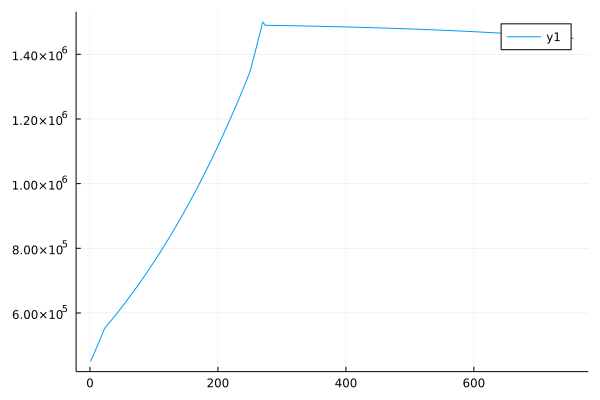

In [161]:
# Scenario: Rent
forever = DateTime(2200,1,1)
retirementYear = 2044
year2 = 2024
year21 = 2043
year23 = 2045
salaryIncome = Cashflow(salary/12,now(),DateTime(retirementYear,8,18))
survivalExpense = Cashflow(survival/12,now(),forever)
livingExpense = Cashflow(living/12,now(),forever)
rentExpense = Cashflow(rent,now(),forever)
apricotExpense = Cashflow(child/12,now(),DateTime(year21,1,1))
bambinoExpense = Cashflow(child/12,DateTime(year2,1,1),DateTime(year23,1,1))
rates = Rates(0.02/12, 0.04/12)
yearsToPlot = 100 - currentAge
amoritization = generateAmoritization(
  currentNetWorth,
  [ salaryIncome ],
  [ survivalExpense, livingExpense, rentExpense, apricotExpense, bambinoExpense ],
  rates,
  12*yearsToPlot)
@info "Retire at age: $(retirementYear-1984)"
plot(amoritization)


┌ Info: Retire at age: 70
└ @ Main /home/jim/Workspace/Personal/fire/logic/amoritization.ipynb:19


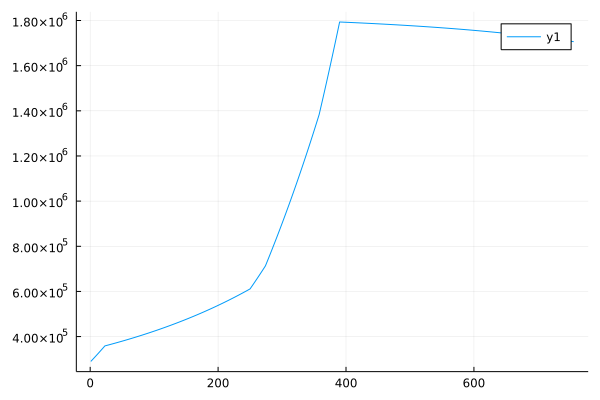

In [177]:
# Scenario: Buy big house.
forever = DateTime(2200,1,1)
retirementWithBigHouse = 2054
year30 = 2052
modifiedSalary = 1.3 * salary
salaryIncome = Cashflow(modifiedSalary/12,now(),DateTime(retirementWithBigHouse,8,18))
survivalExpense = Cashflow(survival/12,now(),forever)
livingExpense = Cashflow(living/12,now(),forever)
bigMortgageExpense = Cashflow(bigMortgage,now(),DateTime(year30,1,1))
bigHomeExpense = Cashflow(bigMortgage,now(),forever)
rates = Rates(0.02/12, 0.04/12)
yearsToPlot = 100 - currentAge
amoritization = generateAmoritization(
  currentNetWorth - bigDownpayment,
  [ salaryIncome ],
  [ survivalExpense,livingExpense,bigMortgageExpense,bigHomeExpense, apricotExpense, bambinoExpense ],
  rates,
  12*yearsToPlot)
@info "Retire at age: $(retirementWithBigHouse-1984)"
plot(amoritization)

┌ Info: Retire at age: 70
└ @ Main /home/jim/Workspace/Personal/fire/logic/amoritization.ipynb:17


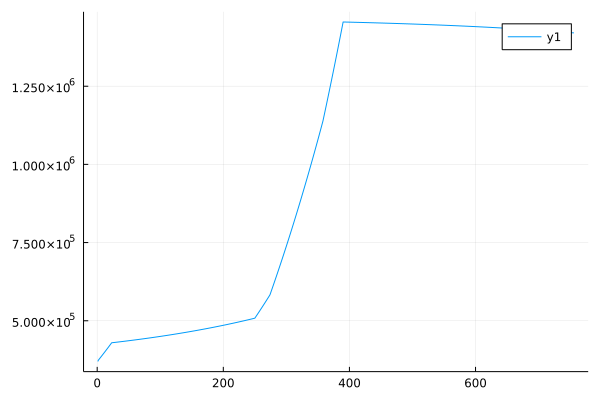

In [173]:
# Scenario: Buy small house.
forever = DateTime(2200,1,1)
retirementWithSmallHouse = 2054
salaryIncome = Cashflow(salary/12,now(),DateTime(retirementWithSmallHouse,8,18))
survivalExpense = Cashflow(survival/12,now(),forever)
livingExpense = Cashflow(living/12,now(),forever)
smallMortgageExpense = Cashflow(smallMortgage,now(),DateTime(year30,1,1))
smallHomeExpense = Cashflow(smallMortgage,now(),forever)
rates = Rates(0.02/12, 0.04/12)
yearsToPlot = 100 - currentAge
amoritization = generateAmoritization(
  currentNetWorth - smallDownpayment,
  [ salaryIncome ],
  [ survivalExpense, livingExpense, smallMortgageExpense, smallHomeExpense, apricotExpense, bambinoExpense ],
  rates,
  12*yearsToPlot)
@info "Retire at age: $(retirementWithSmallHouse-1984)"
plot(amoritization)